In [5]:
import tensorflow as tf

In [6]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Dropout,BatchNormalization
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.applications.inception_v3 import InceptionV3

In [7]:
image_size = [128,128]
data_path = './Basededatos/'

In [8]:
conv = VGG16(input_shape= image_size+[3],weights='imagenet',include_top=False)

In [9]:
conv.output

<KerasTensor: shape=(None, 4, 4, 512) dtype=float32 (created by layer 'block5_pool')>

In [10]:
for layer in conv.layers:
    layer.trainable = False

In [11]:
x = conv.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024,activation='relu')(x)
x = Dense(1024,activation='relu')(x)
x = Dense(512, activation='relu')(x)
x=  Dropout(.2)(x)
pred = Dense(2,activation='softmax')(x)
model = Model(inputs = conv.input,outputs=pred)

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [14]:
train_datagen=ImageDataGenerator(
    rescale=1/255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    vertical_flip=True,
    validation_split=0.2)

train_generator=train_datagen.flow_from_directory('./Basededatos/', target_size=(128,128),  shuffle=False, subset='training', batch_size=10, class_mode='categorical')
val_generator = train_datagen.flow_from_directory('./Basededatos/', target_size=(128,128),  shuffle=False, subset='validation', batch_size=10, class_mode='categorical')

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

Found 471 images belonging to 2 classes.
Found 117 images belonging to 2 classes.


In [15]:
print(train_generator.n)
print(train_generator.batch_size)
print(242//32)

471
10
7


In [16]:
print(val_generator.n)
print(val_generator.batch_size)
#Next we have to create a labels.txt file that will hold all our labels (important for Flutter)
print(train_generator.class_indices) #prints every single key and class of that dataset
labels = '\n'.join(sorted(train_generator.class_indices.keys())) #print all these keys as a list of labels into a text file called labels.txt
with open('labels.txt', 'w') as f: #writes to the labels.txt file, and if it doesnt exists, it creates one, and if it does exist, it will overrite it. (thats what 'w' is for)
    f.write(labels)

#preprocessing of raw data is hence complete and now its time to build our neural network

117
10
{'Con tumor': 0, 'Sin tumor': 1}


In [17]:
step_size_train=train_generator.n//train_generator.batch_size
history = model.fit_generator(generator=train_generator, steps_per_epoch=step_size_train, epochs=60,  verbose=1, validation_data=val_generator)

Epoch 1/60
47/47 [==============================] - 13s 264ms/step - loss: 1.0343 - accuracy: 0.7918 - val_loss: 0.4331 - val_accuracy: 0.8291
Epoch 2/60
47/47 [==============================] - 12s 260ms/step - loss: 0.4238 - accuracy: 0.8265 - val_loss: 0.3834 - val_accuracy: 0.8291
Epoch 3/60
47/47 [==============================] - 12s 260ms/step - loss: 0.2828 - accuracy: 0.8612 - val_loss: 0.5343 - val_accuracy: 0.6068
Epoch 4/60
47/47 [==============================] - 12s 263ms/step - loss: 0.4279 - accuracy: 0.8395 - val_loss: 0.3284 - val_accuracy: 0.8803
Epoch 5/60
47/47 [==============================] - 12s 266ms/step - loss: 0.2743 - accuracy: 0.8894 - val_loss: 0.3946 - val_accuracy: 0.8547
Epoch 6/60
47/47 [==============================] - 12s 265ms/step - loss: 0.2556 - accuracy: 0.9024 - val_loss: 0.2913 - val_accuracy: 0.8803
Epoch 7/60
47/47 [==============================] - 12s 265ms/step - loss: 0.2673 - accuracy: 0.8829 - val_loss: 0.3495 - val_accuracy: 0.8632

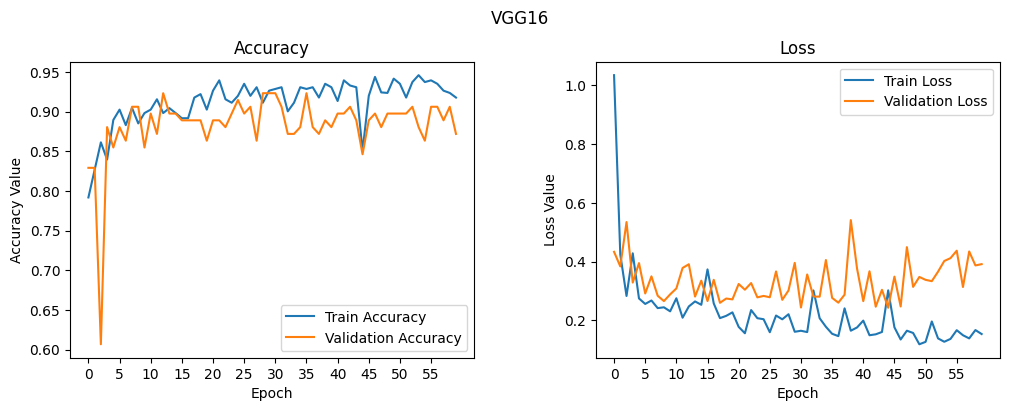

In [19]:
import matplotlib.pyplot as plt
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('VGG16', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(len(history.history['accuracy'])))  # Asegurar que epoch_list tenga la misma longitud que los datos
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, len(epoch_list), 5))  # Ajustar los ticks del eje x
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, len(epoch_list), 5))  # Ajustar los ticks del eje x
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

plt.show()

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [21]:
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(val_generator, val_generator.n // val_generator.batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

In [22]:
print(val_generator.classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]


In [23]:
print('Confusion Matrix')
print(confusion_matrix(val_generator.classes, y_pred))

Confusion Matrix
[[89  8]
 [ 2 18]]


In [24]:
print('Classification Report')
target_names = ['No Tumor', 'Tumor']
print(classification_report(val_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

    No Tumor       0.98      0.92      0.95        97
       Tumor       0.69      0.90      0.78        20

    accuracy                           0.91       117
   macro avg       0.84      0.91      0.86       117
weighted avg       0.93      0.91      0.92       117



Text(113.9222222222222, 0.5, 'True Values')

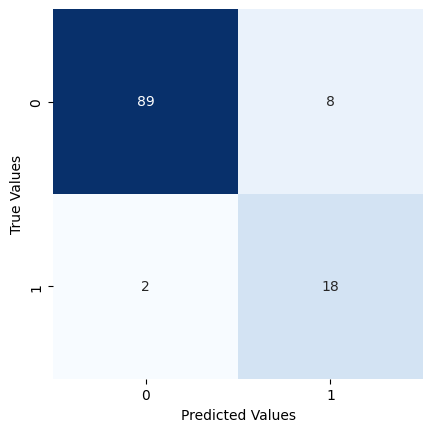

In [25]:
import seaborn as sns
cm=confusion_matrix(val_generator.classes, y_pred)
sns.heatmap(cm, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')

[Text(0, 0.5, 'Tumor'), Text(0, 1.5, 'No Tumor')]

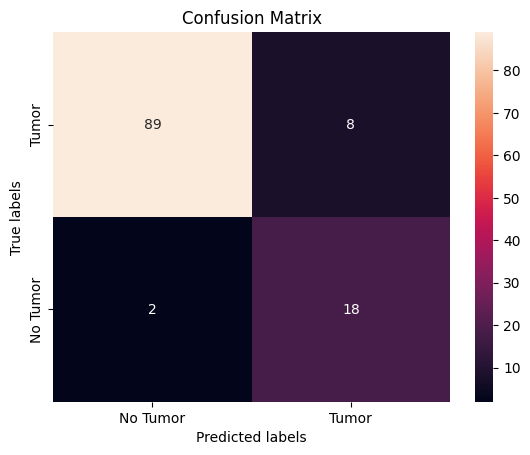

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['No Tumor', 'Tumor']); ax.yaxis.set_ticklabels(['Tumor', 'No Tumor'])

Confusion Matrix :
[[89  8]
 [ 2 18]]
Accuracy Score : 0.9145299145299145
Report : 
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        97
           1       0.69      0.90      0.78        20

    accuracy                           0.91       117
   macro avg       0.84      0.91      0.86       117
weighted avg       0.93      0.91      0.92       117



<Axes: >

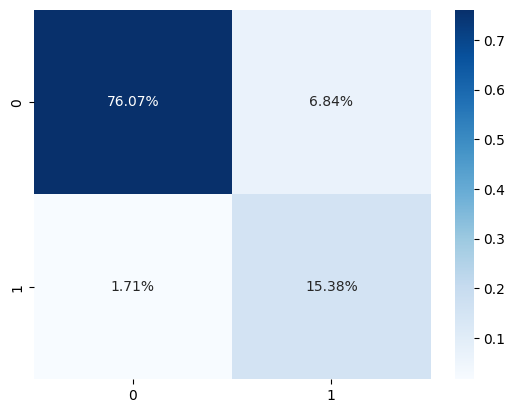

In [27]:
from sklearn.metrics import accuracy_score
results = confusion_matrix(val_generator.classes,y_pred) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(val_generator.classes,y_pred)) 
print('Report : ')
print(classification_report(val_generator.classes,y_pred))

sns.heatmap(results/np.sum(results), annot=True, 
            fmt='.2%', cmap='Blues')

In [28]:
import numpy as np
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(val_generator.classes, y_pred, pos_label=1)
metrics.auc(fpr, tpr)

0.908762886597938

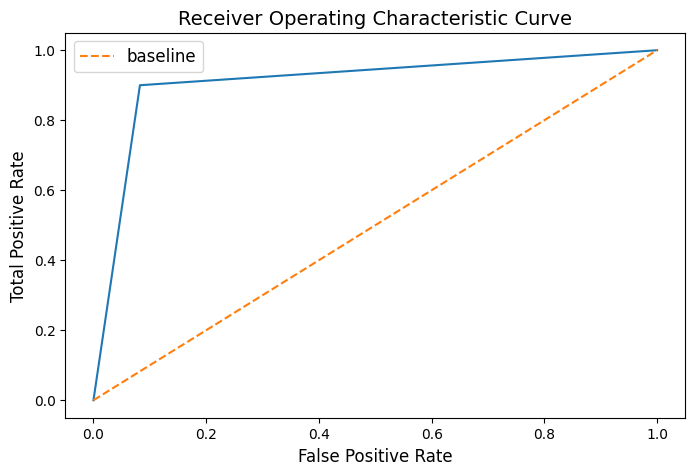

In [29]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(fpr, tpr)
ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
plt.title('Receiver Operating Characteristic Curve', fontsize=14)
plt.ylabel('Total Positive Rate', fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.legend(fontsize=12);